In [5]:
#Method 2: Using Pseudo Inverse matrix to calculate GRADIENT DESCENT

#Instead of repeating x_new = x0 - p.f'(x0) formula, we can use pinv() to calculate the theta matrix that satisfy gradient descent

#For x = (x1, x2, x3,... xi)
# we add the 1-column for it, then x_1 = x^ = (1, x1, x2, x3,... xi)

#For y = (y1, y2, y3,...yi)
# and for theta = (theta0, theta1, theta2, theta3,... theta_i) where theta0 is bias, and other theta are slopes

#===> y_hypothesis = y^ = x^ . theta

#To find the theta matrix that satisfy gradient descent, we solve this equation:
#          X^_T . X^ . theta = X^_T . Y

#=> theta = inv(X^_T . X^) . X^_T . Y (if X^_T . X^ is invertible)

#or theta = pinv(X^_T . X^) . X^_T . Y (if X^_T . X^ is not invertible) in this case we use pinv()

#-----------------------------------#

#Fortunately, the numpy.linalg.pinv() will automatically return "true" inverse matrix if the original one is already invertible,
# else it will return pseudo inverse matrix

In [15]:
"""=============================================================================
Ex5: Gradient Descent
    Cho dữ liệu chiều cao heights (heights_1.txt), weights (weights_1.txt)
        1) Tạo 2 numpy array heights và weights chứa 2 danh sách từ 2 tập tin trên.
        2) Chuyển inches --> mét (h * 0.0254), lbs --> kg (w * 0.453592)
        3) Trực quan hóa dữ liệu theo heights, weights
        4) x = heights đã chuyển theo định dạng chuẩn, y = weights
        5) Với phương trình: y = mx + b (weights = (m * heights) + b) 
            gọi hàm tính m, b: theta = gradient_descent_2(alpha, x, y, 1000)
        6) Từ m, b (m = theta[1], b = theta[0]), dự đoán weights_predict theo m, b
        7) Trực quan hóa dữ liệu
        8) Với chiều cao là 1.8, 1.9, 2.0 thì cân nặng lần lượt là bao nhiêu?   
============================================================================="""
print('-------------GRADIENT DESCENT: Method 2 - Pseudo Inverse matrix ---------------------------------')

-------------GRADIENT DESCENT: Method 2 - Pseudo Inverse matrix ---------------------------------


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from matplotlib.gridspec import GridSpec

In [44]:
print('=============================================================')
print('*** 1) Read data heights_1.txt and weights_1.txt into numpy array heights and weights***')
print('=============================================================')
print()

f1 = open('data_Buoi6/heights_1.txt', 'r')
heights = np.array(eval(f1.read()))
f1.close()
print(f'Heights (inches) array: {heights}')

f2 = open('data_Buoi6/weights_1.txt', 'r')
weights = np.array(eval(f2.read()))
print(f'Weights (pounds) array: {weights}')

*** 1) Read data heights_1.txt and weights_1.txt into numpy array heights and weights***

Heights (inches) array: [74 74 72 ... 75 75 73]
Weights (pounds) array: [180 215 210 ... 205 190 195]


In [47]:
print('=============================================================')
print('*** 2) convert from inches --> meters (*0.0254) and from lbs ---> kg (*0.453592) ***')
print('=============================================================')
print()

heights = heights*0.0254
print(f'Heights (meters) array: {heights}')

weights = weights*0.453592
print(f'Weights (kg) array: {weights}')

*** 2) convert from inches --> meters (*0.0254) and from lbs ---> kg (*0.453592) ***

Heights (meters) array: [1.8796 1.8796 1.8288 ... 1.905  1.905  1.8542]
Weights (kg) array: [81.64656 97.52228 95.25432 ... 92.98636 86.18248 88.45044]


*** 3) Visualize the data with heights and weights (use jointplot) ***



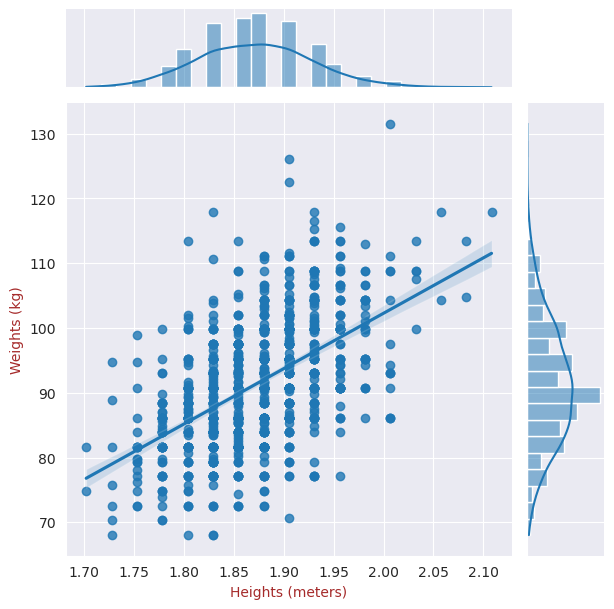

In [65]:
print('=============================================================')
print('*** 3) Visualize the data with heights and weights (use jointplot) ***')
print('=============================================================')
print()

sbn.set_style('darkgrid')
sbn.jointplot(x=heights, y=weights, kind='reg')
plt.xlabel('Heights (meters)', color='brown')
plt.ylabel('Weights (kg)', color='brown')
plt.show()

In [87]:
print('=============================================================')
print('*** 4) assign y = weights, x = heights but add one more columns containing only 1 values ***')
print('=============================================================')
print()

y = weights
print(f'Y = {y}')

x = heights
print(f'X = {x}')

x_1 = np.c_[np.ones(x.shape), x]
print(f'\nX^ = X_1 {x_1.shape} =\n{x_1}')

*** 4) assign y = weights, x = heights but add one more columns containing only 1 values ***

Y = [81.64656 97.52228 95.25432 ... 92.98636 86.18248 88.45044]
X = [1.8796 1.8796 1.8288 ... 1.905  1.905  1.8542]

X^ = X_1 (1015, 2) =
[[1.     1.8796]
 [1.     1.8796]
 [1.     1.8288]
 ...
 [1.     1.905 ]
 [1.     1.905 ]
 [1.     1.8542]]


In [100]:
print('=============================================================')
print('*** 5) Find the y_hypothesis = mx + b using pseudo inverse matrix ***')
print('       b is theta[0] or bias')
print('       m is theta[1] is slope')
print('=============================================================')
print()

theta = np.linalg.pinv((x_1.T).dot(x_1)) .dot(x_1.T) .dot(y)
print(f'Theta = pinv(X^_T . X^) . X^_T . Y = {theta}')

print(f'\nweights_predict = heights*{theta[1]} + {theta[0]}')

weights_predict = heights*theta[1] + theta[0]

*** 5) Find the y_hypothesis = mx + b using pseudo inverse matrix ***
       b is theta[0] or bias
       m is theta[1] is slope

Theta = pinv(X^_T . X^) . X^_T . Y = [-68.55285156  85.42051044]

weights_predict = heights*85.42051043665613 + -68.55285156253981



*** 7) Visualize weights (y) and weights_predict (y_hypo) along with heights (x)***


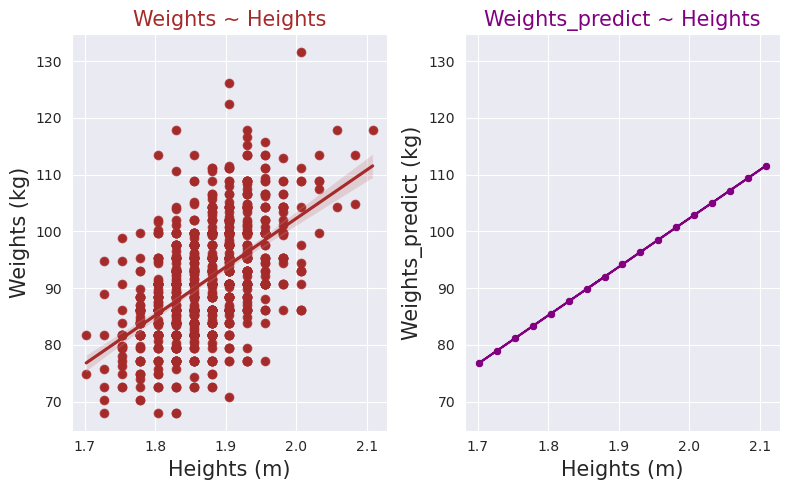

In [106]:
print('\n=============================================================')
print('*** 7) Visualize weights (y) and weights_predict (y_hypo) along with heights (x)***')
print('=============================================================')

fig = plt.figure(figsize=(8,5))
grsp = GridSpec(nrows=1, ncols=2)

weights_fig = fig.add_subplot(grsp[0,0])
sbn.scatterplot(x=heights, y=weights, color='brown') #draw scatter plot
sbn.regplot(x=heights, y=weights, color='brown')            #draw line
weights_fig.set_xlabel('Heights (m)', size=15)
weights_fig.set_ylabel('Weights (kg)', size=15)
weights_fig.set_title('Weights ~ Heights',size=15,color='brown')

weights_predict_fig = fig.add_subplot(grsp[0,1], sharey = weights_fig) #sharey=weights_fig to use the same y axis scale like weights_fig
sbn.scatterplot(x=heights, y=weights_predict, color='purple')
plt.plot(heights, weights_predict, color='purple')
weights_predict_fig.set_xlabel('Heights (m)', size=15)
weights_predict_fig.set_ylabel('Weights_predict (kg)', size=15)
weights_predict_fig.set_title('Weights_predict ~ Heights',size=15,color='purple')

plt.tight_layout()

plt.show()